# Data Pre-Processing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [2]:
df = pd.read_csv("Assignment Data/fake reviews dataset.csv")

## Data Exploration

In [3]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [5]:
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [6]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [7]:
df['category'].value_counts()

category
Kindle_Store_5                  4730
Books_5                         4370
Pet_Supplies_5                  4254
Home_and_Kitchen_5              4056
Electronics_5                   3988
Sports_and_Outdoors_5           3946
Tools_and_Home_Improvement_5    3858
Clothing_Shoes_and_Jewelry_5    3848
Toys_and_Games_5                3794
Movies_and_TV_5                 3588
Name: count, dtype: int64

In [8]:
df['label'].value_counts()

label
CG    20216
OR    20216
Name: count, dtype: int64

In [9]:
df['rating'].value_counts()

rating
5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: count, dtype: int64

In [10]:
df.rename(columns = { 'text_' : 'text'}, inplace = True)
df

,category,rating,label,text
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...


In [11]:
replace_map = {
    'Home_and_Kitchen_5': 'Home_and_Kitchen',
    'Kindle_Store_5': 'Kindle_Store',
    'Books_5': 'Books',
    'Pet_Supplies_5': 'Pet_Supplies',
    'Electronics_5': 'Electronics',
    'Sports_and_Outdoors_5': 'Sports_and_Outdoors',
    'Tools_and_Home_Improvement_5': 'Tools_and_Home_Improvement',
    'Clothing_Shoes_and_Jewelry_5': 'Clothing_Shoes_and_Jewelry',
    'Toys_and_Games_5': 'Toys_and_Games',
    'Movies_and_TV_5': 'Movies_and_TV'
}

for old_value, new_value in replace_map.items():
    df = df.replace(old_value, new_value, regex=True)

In [12]:
df.shape

(40432, 4)

## Data Cleaning

In [13]:
#remove URL

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df["text"] = df["text"].apply(lambda text: remove_urls(text))

In [14]:
df.tail()

,category,rating,label,text
40427,Clothing_Shoes_and_Jewelry,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry,1.0,CG,I liked nothing about this dress. The only rea...
40431,Clothing_Shoes_and_Jewelry,5.0,OR,I work in the wedding industry and have to wor...


In [15]:
# remove digits

df['text'] = df['text'].replace(to_replace=r'\d', value='', regex=True)

In [16]:
# remove punctuation

def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [17]:
df['text'][0], clean_text(df['text'][0])

('Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty',
 'Love Well made sturdy comfortable love itVery pretty')

In [18]:
df['text'].head().apply(clean_text)

0    Love Well made sturdy comfortable love itVery ...
1    love great upgrade original Ive mine couple years
2              pillow saved back love look feel pillow
3          Missing information use great product price
4                 nice set Good quality set two months
Name: text, dtype: object

In [19]:
df['text'] = df['text'].astype(str)

In [20]:
def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])

In [21]:
preprocess(df['text'][4])

'Very nice set Good quality We set two months'

In [22]:
df['text'][:10000] = df['text'][:10000].apply(preprocess)

In [23]:
df['text'][10001:20000] = df['text'][10001:20000].apply(preprocess)

In [24]:
df['text'][20001:30000] = df['text'][20001:30000].apply(preprocess)

In [25]:
df['text'][30001:40000] = df['text'][30001:40000].apply(preprocess)

In [26]:
df['text'][40001:40432] = df['text'][40001:40432].apply(preprocess) 

In [27]:
df['text'] = df['text'].str.lower()

In [28]:
df.head()

,category,rating,label,text
0,Home_and_Kitchen,5.0,CG,love well made sturdy comfortable i love very ...
1,Home_and_Kitchen,5.0,CG,love great upgrade original i 've mine couple ...
2,Home_and_Kitchen,5.0,CG,this pillow saved back i love look feel pillow
3,Home_and_Kitchen,1.0,CG,missing information use great product price i
4,Home_and_Kitchen,5.0,CG,very nice set good quality we set two months


In [29]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df['text'] = df['text'].apply(lambda x: stem_words(x))

In [30]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df["text"] = df["text"].apply(lambda text: lemmatize_words(text))

In [31]:
df['text'].head()

0    love well made sturdi comfort i love veri pretti
1      love great upgrad origin i 've mine coupl year
2        thi pillow save back i love look feel pillow
3               miss inform use great product price i
4         veri nice set good qualiti we set two month
Name: text, dtype: object

In [32]:
#check duplicated rows
print(df.duplicated().sum())
df[df.duplicated()]

28


,category,rating,label,text
6025,Sports_and_Outdoors,5.0,CG,thi realli good starter kit lot tool lot optio...
6708,Sports_and_Outdoors,5.0,CG,great complaint comfort phone fit pocket comfo...
12548,Movies_and_TV,5.0,CG,one best movi year not everyon but i pretti im...
16443,Tools_and_Home_Improvement,5.0,CG,thi sturdi saw the problem come small screw dr...
19742,Pet_Supplies,5.0,CG,my dog love kept occupi long time she chase
19802,Pet_Supplies,5.0,CG,my dog love kept occupi long time she chase
19803,Pet_Supplies,5.0,CG,my dog love kept occupi long time she chase
19967,Pet_Supplies,5.0,CG,my dog love kept occupi long time she mind
20242,Pet_Supplies,5.0,CG,my dog love kept occupi long time she chase
22305,Pet_Supplies,5.0,OR,got give mth old chihuahua diagnos elbow dyspl...


In [33]:
# drop duplicated rows
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [34]:
df.to_csv('preprocessed.csv')

# New Section for Model Training starts here

## run the data frame from here

In [35]:
new_df = pd.read_csv('preprocessed.csv')

In [36]:
new_df.head()

,Unnamed: 0,category,rating,label,text
0,0,Home_and_Kitchen,5.0,CG,love well made sturdi comfort i love veri pretti
1,1,Home_and_Kitchen,5.0,CG,love great upgrad origin i 've mine coupl year
2,2,Home_and_Kitchen,5.0,CG,thi pillow save back i love look feel pillow
3,3,Home_and_Kitchen,1.0,CG,miss inform use great product price i
4,4,Home_and_Kitchen,5.0,CG,veri nice set good qualiti we set two month


In [37]:
new_df.drop('Unnamed: 0',axis=1,inplace=True)

In [38]:
new_df.head()

,category,rating,label,text
0,Home_and_Kitchen,5.0,CG,love well made sturdi comfort i love veri pretti
1,Home_and_Kitchen,5.0,CG,love great upgrad origin i 've mine coupl year
2,Home_and_Kitchen,5.0,CG,thi pillow save back i love look feel pillow
3,Home_and_Kitchen,1.0,CG,miss inform use great product price i
4,Home_and_Kitchen,5.0,CG,veri nice set good qualiti we set two month


In [39]:
new_df.dropna(inplace=True)
new_df['length'] = df['text'].apply(len)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40403 entries, 0 to 40403
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40403 non-null  object 
 1   rating    40403 non-null  float64
 2   label     40403 non-null  object 
 3   text      40403 non-null  object 
 4   length    40375 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.8+ MB


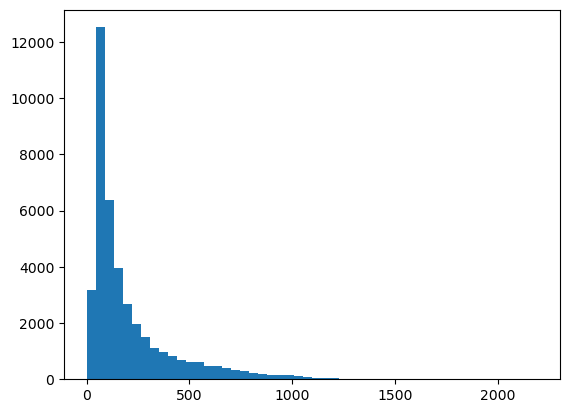

In [40]:
plt.hist(new_df['length'],bins=50)
plt.show()

In [41]:
new_df.groupby('label').describe()

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
CG     20188.0  4.258916  1.141533  1.0  4.0  5.0  5.0  5.0  20174.0   
OR     20215.0  4.253228  1.147668  1.0  4.0  5.0  5.0  5.0  20201.0   

                                                                 
             mean         std  min   25%    50%     75%     max  
label                                                            
CG     198.893427  208.739628  8.0  60.0  110.0  249.75  2193.0  
OR     210.139498  225.281396  0.0  68.0  121.0  254.00  2145.0

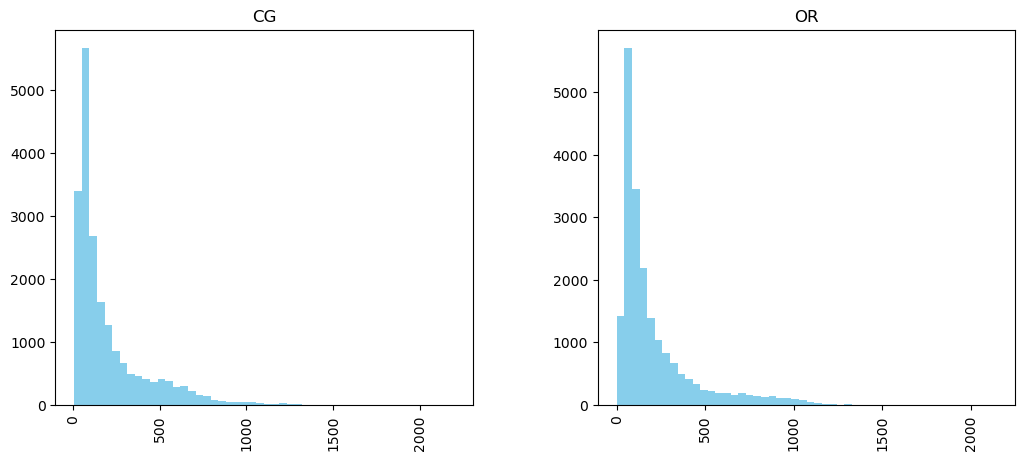

In [42]:
new_df.hist(column='length',by='label',bins=50,color='skyblue',figsize=(12,5))
plt.show()

In [43]:
new_df[new_df['label']=='OR'][['text','length']].sort_values(by='length',ascending=False).head().iloc[0].text

"our hous one kitchen builder 's electr contractor dissuad u put `` easi instal cost fraction charg '' well first part true easi instal the second part patent fals cost instal unit hous one clearli see cost howev mess build hous littl thing like research get swept rug work myriad decis one make hurri like home today litter devic charg differ type power block cabl place famili guest constantli vy covet outlet high enough dog ca n't get cord devic back turn thi littl gem like kitchen allow devic charg need and keep wife 's recip book i mean ipad ever charg cook look along phone ... give outlet applianc thi receptacl quick easi instal make sure turn breaker end er wors the instruct spot the usb port amp charg fast harder batteri ye fast iphon went zero full min estim i n't time precis i highli recommend unit anyon"

In [44]:
new_df.length.describe()

count    40375.000000
mean       204.520223
std        217.243692
min          0.000000
25%         64.000000
50%        116.000000
75%        252.000000
max       2193.000000
Name: length, dtype: float64

In [45]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [46]:
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x00000244328B76A0>)

In [47]:
bow_transformer.fit(new_df['text'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 32089


In [48]:
review4 = new_df['text'][3]
review4

'miss inform use great product price i'

In [49]:
bow_msg4 = bow_transformer.transform([review4])
print(bow_msg4)
print(bow_msg4.shape)

  (0, 11582)	1
  (0, 13707)	1
  (0, 17675)	1
  (0, 21663)	1
  (0, 21794)	1
  (0, 29897)	1
(1, 32089)


In [52]:
print(bow_transformer.get_feature_names_out()[11582])
print(bow_transformer.get_feature_names_out()[13707])
print(bow_transformer.get_feature_names_out()[17675])
print(bow_transformer.get_feature_names_out()[21663])
print(bow_transformer.get_feature_names_out()[21794])
print(bow_transformer.get_feature_names_out()[29897])

great
inform
miss
price
product
use


In [53]:
# converts the raw text data into numerical data
bow_reviews = bow_transformer.transform(new_df['text'])

In [54]:
print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

Shape of Bag of Words Transformer for the entire reviews corpus: (40403, 32089)
Amount of non zero values in the bag of words model: 1009649


In [55]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.08


In [56]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(bow_msg4)

  (0, 11582)	1
  (0, 13707)	1
  (0, 17675)	1
  (0, 21663)	1
  (0, 21794)	1
  (0, 29897)	1


In [57]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['mango']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['book']])

10.91353688838913
2.8217564428907522


In [58]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

Shape: (40403, 32089)
No. of Dimensions: 2


## Model Building

## create training and testing data

In [59]:
review_train, review_test, label_train, label_test = train_test_split(df['text'],df['label'],test_size=0.3)

### Multinomial Naive Bayes

In [85]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint

In [61]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [62]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000244328B76A0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [63]:
predictions = pipeline.predict(review_test)
predictions

array(['CG', 'OR', 'CG', ..., 'CG', 'CG', 'CG'], dtype='<U2')

In [64]:
print('Classification Report:',classification_report(label_test,predictions))
print('Confusion Matrix:',confusion_matrix(label_test,predictions))
print('Accuracy Score:',accuracy_score(label_test,predictions))

Classification Report:               precision    recall  f1-score   support

          CG       0.82      0.89      0.85      5967
          OR       0.89      0.81      0.84      6155

    accuracy                           0.85     12122
   macro avg       0.85      0.85      0.85     12122
weighted avg       0.85      0.85      0.85     12122

Confusion Matrix: [[5339  628]
 [1199 4956]]
Accuracy Score: 0.8492822966507177


In [65]:
print('MNB Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

MNB Prediction Accuracy: 84.93%


In [87]:
pipeline_mnb = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

# Define the parameter grid
param_grid_mnb = {
    'bow__ngram_range': [(1, 1), (1, 2)],  # Uni-gram or Bi-gram
    'tfidf__use_idf': (True, False),
    'classifier__alpha': [0.1, 0.5, 1.0]
}

# Instantiate the grid search with 5-fold cross-validation
grid_search_mnb = GridSearchCV(pipeline_mnb, param_grid_mnb, cv=5, n_jobs=1, verbose=2)

# Perform the grid search
grid_search_mnb.fit(review_train, label_train)

# Report the results
print("Best Parameters for MNB:", grid_search_mnb.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END bow__ngram_range=(1, 1), classifier__alpha=0.1, tfidf__use_idf=True; total time= 4.1min
[CV] END bow__ngram_range=(1, 1), classifier__alpha=0.1, tfidf__use_idf=True; total time= 5.3min
[CV] END bow__ngram_range=(1, 1), classifier__alpha=0.1, tfidf__use_idf=True; total time= 4.8min
[CV] END bow__ngram_range=(1, 1), classifier__alpha=0.1, tfidf__use_idf=True; total time= 1.9min
[CV] END bow__ngram_range=(1, 1), classifier__alpha=0.1, tfidf__use_idf=True; total time= 2.2min
[CV] END bow__ngram_range=(1, 1), classifier__alpha=0.1, tfidf__use_idf=False; total time= 2.5min
[CV] END bow__ngram_range=(1, 1), classifier__alpha=0.1, tfidf__use_idf=False; total time= 3.3min
[CV] END bow__ngram_range=(1, 1), classifier__alpha=0.1, tfidf__use_idf=False; total time= 4.1min
[CV] END bow__ngram_range=(1, 1), classifier__alpha=0.1, tfidf__use_idf=False; total time= 4.2min
[CV] END bow__ngram_range=(1, 1), classifier__alpha=0.1, tfidf

### Random Forest

In [66]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [67]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000244328B76A0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [68]:
rfc_pred = pipeline.predict(review_test)
rfc_pred

array(['CG', 'OR', 'CG', ..., 'CG', 'OR', 'CG'], dtype=object)

In [69]:
print('Classification Report:',classification_report(label_test,rfc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,rfc_pred))
print('Accuracy Score:',accuracy_score(label_test,rfc_pred))

Classification Report:               precision    recall  f1-score   support

          CG       0.81      0.89      0.85      5967
          OR       0.88      0.79      0.84      6155

    accuracy                           0.84     12122
   macro avg       0.84      0.84      0.84     12122
weighted avg       0.85      0.84      0.84     12122

Confusion Matrix: [[5315  652]
 [1268 4887]]
Accuracy Score: 0.8416102953308034


In [70]:
print('Random Forest Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')

Random Forest Prediction Accuracy: 84.16%


In [96]:
# Define the pipeline
pipeline_rf = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])

# Define the parameter distributions for RandomizedSearchCV
param_dist_rf = {
    'classifier__n_estimators': randint(50, 200),  # Random integer values between 50 and 200
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': randint(2, 10),  # Random integer values between 2 and 10
    'classifier__min_samples_leaf': randint(1, 5),    # Random integer values between 1 and 5
    'classifier__max_features': ['auto', 'sqrt']
}

# Instantiate the RandomizedSearchCV with 5-fold cross-validation
random_search_rf = RandomizedSearchCV(pipeline_rf, param_dist_rf, cv=5, n_iter=50, n_jobs=1, verbose=2)

# Perform the randomized search
random_search_rf.fit(review_train, label_train)

# Report the results
print("Best Parameters for Random Forest (Randomized Search):", random_search_rf.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END classifier__max_depth=None, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=3, classifier__n_estimators=130; total time= 2.8min
[CV] END classifier__max_depth=None, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=3, classifier__n_estimators=130; total time= 3.5min
[CV] END classifier__max_depth=None, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=3, classifier__n_estimators=130; total time= 2.0min
[CV] END classifier__max_depth=None, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=3, classifier__n_estimators=130; total time= 2.0min
[CV] END classifier__max_depth=None, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=3, classifier__n_estimators=130; total time= 2.0min
[CV] END classifier__max_dep

### Support Vector Machine

In [71]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [72]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000244328B76A0>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [73]:
svc_pred = pipeline.predict(review_test)
svc_pred

array(['CG', 'OR', 'CG', ..., 'CG', 'OR', 'CG'], dtype=object)

In [74]:
print('Classification Report:',classification_report(label_test,svc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,svc_pred))
print('Accuracy Score:',accuracy_score(label_test,svc_pred))

Classification Report:               precision    recall  f1-score   support

          CG       0.89      0.87      0.88      5967
          OR       0.87      0.90      0.89      6155

    accuracy                           0.88     12122
   macro avg       0.88      0.88      0.88     12122
weighted avg       0.88      0.88      0.88     12122

Confusion Matrix: [[5173  794]
 [ 619 5536]]
Accuracy Score: 0.8834350767200132


In [75]:
print('SVC Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')

SVC Prediction Accuracy: 88.34%


In [91]:
# Define the pipeline
pipeline_svc = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', SVC())
])

# Define the parameter grid
param_grid_svc = {
    'classifier__C': [0.1, 1, 10], 
    'classifier__kernel': ['linear', 'rbf']
}

# Instantiate the grid search with 5-fold cross-validation
grid_search_svc = GridSearchCV(pipeline_svc, param_grid_svc, cv=5, n_jobs=1, verbose=2)

# Perform the grid search
grid_search_svc.fit(review_train, label_train)

# Report the results
print("Best Parameters for SVC:", grid_search_svc.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .......classifier__C=0.1, classifier__kernel=linear; total time= 3.2min
[CV] END .......classifier__C=0.1, classifier__kernel=linear; total time= 3.1min
[CV] END .......classifier__C=0.1, classifier__kernel=linear; total time= 3.2min
[CV] END .......classifier__C=0.1, classifier__kernel=linear; total time= 3.1min
[CV] END .......classifier__C=0.1, classifier__kernel=linear; total time= 3.1min
[CV] END ..........classifier__C=0.1, classifier__kernel=rbf; total time= 3.5min
[CV] END ..........classifier__C=0.1, classifier__kernel=rbf; total time= 3.5min
[CV] END ..........classifier__C=0.1, classifier__kernel=rbf; total time= 3.5min
[CV] END ..........classifier__C=0.1, classifier__kernel=rbf; total time= 3.5min
[CV] END ..........classifier__C=0.1, classifier__kernel=rbf; total time= 3.5min
[CV] END .........classifier__C=1, classifier__kernel=linear; total time= 3.3min
[CV] END .........classifier__C=1, classifier__ke

### Logistic Regression

In [76]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])

In [77]:

pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000244328B76A0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [78]:
lr_pred = pipeline.predict(review_test)
lr_pred

array(['CG', 'OR', 'CG', ..., 'CG', 'OR', 'CG'], dtype=object)

In [79]:
print('Classification Report:',classification_report(label_test,lr_pred))
print('Confusion Matrix:',confusion_matrix(label_test,lr_pred))
print('Accuracy Score:',accuracy_score(label_test,lr_pred))

Classification Report:               precision    recall  f1-score   support

          CG       0.87      0.85      0.86      5967
          OR       0.86      0.88      0.87      6155

    accuracy                           0.87     12122
   macro avg       0.87      0.87      0.87     12122
weighted avg       0.87      0.87      0.87     12122

Confusion Matrix: [[5090  877]
 [ 745 5410]]
Accuracy Score: 0.8661936974096683


In [80]:
print('Logistic Regression Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')

Logistic Regression Prediction Accuracy: 86.62%


In [93]:
pipeline_lr = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', LogisticRegression())
])

# Define the parameter grid
param_grid_lr = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2']
}

# Instantiate the grid search with 5-fold cross-validation
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, n_jobs=1, verbose=2)

# Perform the grid search
grid_search_lr.fit(review_train, label_train)

# Report the results
print("Best Parameters for Linear Regression:", grid_search_lr.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..........classifier__C=0.1, classifier__penalty=l1; total time= 1.5min
[CV] END ..........classifier__C=0.1, classifier__penalty=l1; total time= 1.5min
[CV] END ..........classifier__C=0.1, classifier__penalty=l1; total time= 1.5min
[CV] END ..........classifier__C=0.1, classifier__penalty=l1; total time= 1.5min
[CV] END ..........classifier__C=0.1, classifier__penalty=l1; total time= 1.5min
[CV] END ..........classifier__C=0.1, classifier__penalty=l2; total time= 1.9min
[CV] END ..........classifier__C=0.1, classifier__penalty=l2; total time= 1.9min
[CV] END ..........classifier__C=0.1, classifier__penalty=l2; total time= 1.9min
[CV] END ..........classifier__C=0.1, classifier__penalty=l2; total time= 1.9min
[CV] END ..........classifier__C=0.1, classifier__penalty=l2; total time= 1.9min
[CV] END ............classifier__C=1, classifier__penalty=l1; total time= 1.5min
[CV] END ............classifier__C=1, classifier_

# Model Accuracy Summarizer

In [97]:
lr_accuracy = np.round(accuracy_score(label_test, lr_pred) * 100, 2)
rfc_accuracy = np.round(accuracy_score(label_test, rfc_pred) * 100, 2)
svc_accuracy = np.round(accuracy_score(label_test, svc_pred) * 100, 2)
nb_accuracy = np.round(accuracy_score(label_test, predictions) * 100, 2)

# Create DataFrame
models = pd.DataFrame({
    'Model': ['Multinomial Naive Bayes', 'Random Forests Classifier','Support Vector Machines', 'Logistic Regression'], 
    'Accuracy': [lr_accuracy, rfc_accuracy, svc_accuracy, nb_accuracy]
})

models

,Model,Accuracy
0,Multinomial Naive Bayes,86.62
1,Random Forests Classifier,84.16
2,Support Vector Machines,88.34
3,Logistic Regression,84.93
